*Creado por:*
    
*Isabel Maniega*

Se pide crear un Clasificador para el MNIST dataset 

que incluya imágenes:
    
* en blanco y negro 
* de 10 dígitos (0-9)
* 28x28 pixels

(28,28,1)

****

**en este caso:**

* (1) LO hacemos celda a celda
* (2) Añadimos EarlyStopping, lo que hará parar el entrenamiento
* (3) Visualizamos la información, algo también interesante
* (4) model.evaluate(x_valid, y_valid)

# IMPORTAMOS NUESTRAS DEPENDENCIAS

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.saving import load_model

from matplotlib import pyplot as plt

2025-07-10 13:26:23.902227: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 13:26:23.912590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752146783.928658   64574 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752146783.932174   64574 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752146783.942117   64574 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# LEEMOS LOS DATOS

In [2]:
# from keras.datasets import mnist

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [ ]:
# print(x_train)
# print(y_train)
# print(x_valid)
# print(y_valid)

In [3]:
x_train.max(), x_valid.max(), x_train.min(), x_valid.min()

(np.uint8(255), np.uint8(255), np.uint8(0), np.uint8(0))

# NORMALIZAMOS LOS DATOS 

**/255**

In [4]:
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0

In [5]:
x_train.max(), x_valid.max(), x_train.min(), x_valid.min()

# se ve que está escalado entre 0 y 1

(np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0))

# reshape para x_train, x_valid

In [6]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_valid = x_valid.reshape((-1, 28, 28, 1))

In [ ]:
# print(x_train)
# print(x_valid)

# VISUALIZACIÓN DE LA INFORMACIÓN

y_train es el valor de:  0


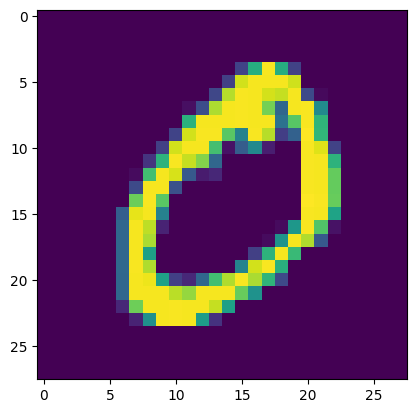

In [7]:
plt.imshow(x_train[1][:,:,0])
print('y_train es el valor de: ', y_train[1])

y_train es el valor de:  2


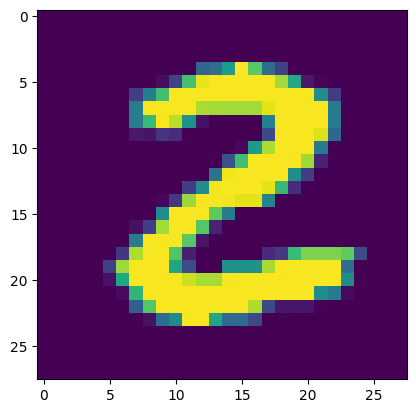

In [8]:
plt.imshow(x_train[25][:,:,0])
print('y_train es el valor de: ', y_train[25])

y_train es el valor de:  5


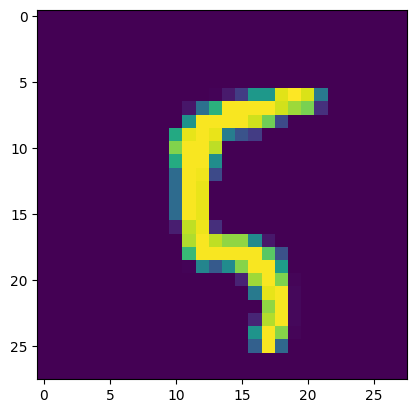

In [9]:
plt.imshow(x_train[100][:,:,0])
print('y_train es el valor de: ', y_train[100])

y_train es el valor de:  3


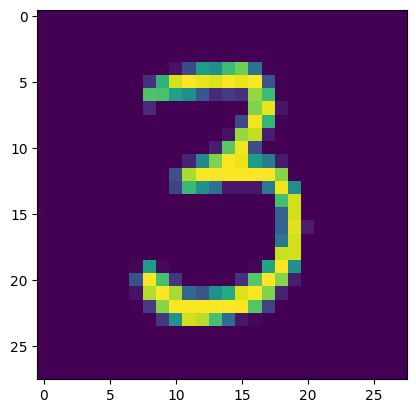

In [10]:
plt.imshow(x_train[50][:,:,0])
print('y_train es el valor de: ', y_train[50])

# MODELO

In [11]:
model = Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=64, activation='relu'),
        Dense(units=10, activation='softmax')  
])

/home/isabelmaniega/Documentos/IA_Python/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752146885.710752   64574 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 94 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1752146885.735446   64574 cuda_executor.cc:479] failed to allocate 94.94MiB (99549184 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           min_delta=0.01,
                           verbose=1)

In [14]:
history = model.fit(x=x_train, y=y_train, 
                    epochs=10, 
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop])

2025-07-10 13:28:50.798256: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 179.44MiB (rounded to 188160000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-07-10 13:28:50.798286: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-07-10 13:28:50.798294: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 21, Chunks in use: 21. 5.2KiB allocated for chunks. 5.2KiB in use in bin. 764B client-requested in use in bin.
2025-07-10 13:28:50.798298: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-07-10 13:28:50.79

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

# GRÁFICAS DE ENTRENAMIENTO

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# model.evaluate(x_valid, y_valid)

# GUARDAMOS EL MODELO

In [ ]:
model.save("model_2.h5")

# CARGAMOS EL MODELO

In [ ]:
model = load_model("model_2.h5")

# RESUMEN

In [ ]:
model.summary()

# Evaluate

In [ ]:
model.evaluate(x_valid, y_valid)

In [ ]:
loss, accuracy = model.evaluate(x_valid, y_valid)
print('\n')
print('loss:', loss)
print('accuracy:', accuracy)

*Creado por:*
    
*Isabel Maniega*